# Theory Assignments

## 1.Forward and back propogation

As we know that computation graphs in a neural network is used to organise the computation ,it used forward and backward propogation to do so.

Forward prop means moving left to right (which essentially means from input toward the output) in the computation graph,which is the process that starts after the initialisation of the model parameters,i.e calculating the initial cost function and in turn calculating the loss function(whose sum is to be minimised), based on the weighted sum, an activation function is applied to make the network non-linear and make it learn as the computation progresses. The activation function uses bias to make it non-linear.These takes place in the hidden layers which results in better accuracy of our model!


In a neural network, we would update the weights and biases of the neurons on the basis of the error at the output. This process is known as back-propagation.In backprop we move from right to left in the computation graph,back propogation basically update the parameters in order to find the best fit model to our data, backpropagation computes the gradient of the loss function with respect to the weights of the network for a single input–output example, and does so efficiently, unlike a naive direct computation of the gradient (using the chain rule) with respect to each weight individually.This lets us use gradient descent and various other algorithm on it effecienty,we move from output layer towards the input layer!

## 2.Calculating forward and back prop for hidden neurons

Figure of a single layer MLP, which contains 5 neurons in hidden layers. Given an input x (is an array), where x[i] and i is from 0 to 3, and y is ground truth (true output). Calculate forward and backward propagation for all hidden neurons (a[i] where i is from 0 to 4) and also, then write the same in the form of vectors and arrays. 

#### Forward propogation 
$X=[x[0],
   x[1],
   x[2],
   x[3]]$
   
X is the input vector,shape is (4,1)as we are considering one input with 4 features.Y is the binary output.All the biases in all the layer can be intialized as zero vectors.

$Z^{[1]}=W^{[1]T}.X+b^{[1]}$ ,which is the forward propogation step after the randomintialisation of the weigths matrix shape(5,3) as there are 5 hidden neurons in layer one and 3 feature in the input vector.

$A^{[1]}=g(Z^{[1]})$,is the activation function which is needed to be defined.The value after activation are passed for the output layer to produce an output.

In the output layer we again intialize the weigths for this layer shaped(5,1)as there are 5 inputs for this layer and a single neuron in the layer.

$Z^{[2]}=W^{[2]T}.A^{[1]}+b^{[2]}$

$Y=A^{[2]}=sig(Z^{[2]})$

After passing through the log loss function and minimising the log error we get the updated values of our weights,but for that we do need to use back propogation to get the derivatives of W,Z,b in each layer.

#### Back propogation
Calculation starts in the reverse direction as we go from right to left in the computation graph,$dk=dJ/dk$

$dZ^{[2]}=A^{[2]}-Y$

$dW^{[2]}=(dZ^{[2]}.A^{[1]T})/m$

$db^{[2]}=(\sum_{i=0}^{} dZ^{[2]}_i)/m$,sum along the rows,m is the number of inputs here considered 1.

$dZ^{[1]}=(W^{[2]T}.dZ^{[2]})*g(Z^{[1]})$,* denotes the element wise multiplication of the 2 matrices.

$db^{[1]}=(\sum_{i=0}^{} dZ^{[1]}_i)/m$,keeping the true dimensions,here m=1,sum along the rows so give axis=1 in the in the np.sum().

#### Bonus(MLP)
If we want to look at the general MLP with L layers then we need to update the parameters more or less like the above way,but the indexing changes and we need to use an extra for loop (other than that for the m iterations for cal the average loss function) fro taking care of the L layers.

After deciding the number of neurons in each layer and storing the number of neurons in the $l^{th}$ layer as$n^{[l]}$ we go to intialize the weights for all the layers with randomm normalised values(mean=0) 

##### Forward prop step
for l=1 to m:

$W^{[l]}=np.random.randn(n^{[l]},n^{[l-1]})$
     
$b^{[l]}=np.zeros((n^{[l]},1))$

for l=1 to m:

$Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$

$A^{[l]} = g^{[l]}(Z^{[l]})$

Output $A^{[l]}$, cache($Z^{[l]}$),the cache obtained helps in doing the back propogation as the $Z^{[l]}$ is required.

##### Back propogation

for l=1 to m:

$dZ^{[l]}=dA^{[l]} * g{[l]'}(Z^{[l]})$

$dW^{[l]}=(dZ^{[l]}.A^{[l-1]T})/m$

$db^{[l]}=np.sum(dZ^{[l]},axis=1,keepdims=True)/m$

$dA^{[l-1]}=W^{[l]T}.dZ^{[l]}$

We would apply gradient descent,to train our model.Considering we are taking the log loss functiono as the cost func.

## 3.Activation function calc(s)

### a.Sigmoid
$ A=g(z)=1/(1+e^{-z}) $                        

$g'(z)= g(z)(1-g(z)) = A(1-A)$                     

Here A is the input to the hidden layers after applying the weights 

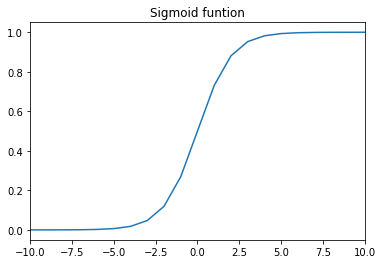

In [18]:
import numpy as np
def sig(z):
       return 1/(1+np.exp(-z))
z=np.arange(-15,15)
import matplotlib.pyplot as plt
plt.xlim(-10,10)
plt.plot(z,sig(z))
plt.title('Sigmoid funtion')
plt.show()

### b.Tanh
$g(z)= tanh(z)=(e^{2z}-1)/(e^{2z}+1)$

$g'(z)=1-(tanh(z))^2=1-g(z)^2$

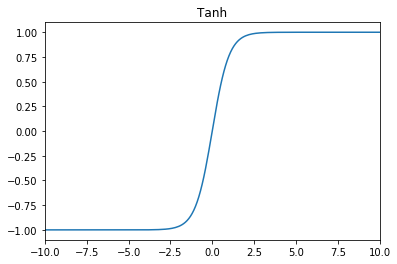

In [34]:
plt.plot(z,np.tanh(z))
plt.xlim(-10,10)
plt.title('Tanh')
plt.show()

### c.ReLU

$g(z)=max(0,z)$

$g'(z)=0,z<0$

$g'(z)=1,z>=0$

The fn is non derivable at 0 but for all practical purposes we can take its diff to be 1 as the probability of it being zero is very small

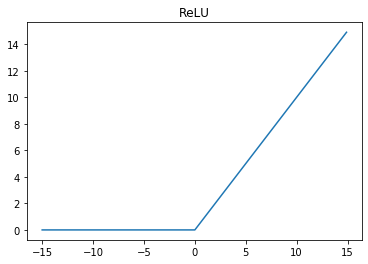

In [33]:
def f(z):
    return np.maximum(0,z)
z=np.arange(-15,15,0.1)
plt.plot(z,f(z))
plt.title('ReLU')
plt.show()

### d.Leaky ReLU

$g(z)=max(k*z,z),k<<1$

$g'(z)=k,z<0$

$g'(z)=1,z>=0$

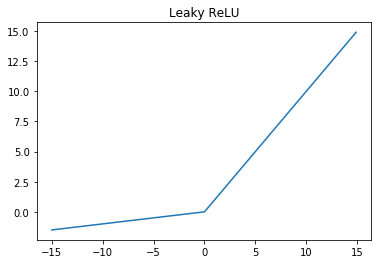

In [32]:
k=0.1
def leaky(z):
    return np.maximum(k*z,z)
plt.plot(z,leaky(z))
plt.title('Leaky ReLU')
plt.show()

### e.Softmax
This activation fn is used when we are performing a mutliclass classification,for binary classification softmax and sigmoid are the same

 $\text{S}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$
 

 

$D_j S_i=\frac{\partial S_i}{\partial a_j}=
\frac{\partial \frac{e^{a_i}}{\sum_{k=1}^{N}e^{a_k}}}{\partial a_j}$



\begin{align*}
\frac{\partial \frac{e^{a_i}}{\sum_{k=1}^{N}e^{a_k}}}{\partial a_j}&=
\frac{e^{a_i}\Sigma-e^{a_j}e^{a_i}}{\Sigma^2}\\
&=\frac{e^{a_i}}{\Sigma}\frac{\Sigma - e^{a_j}}{\Sigma}\\
&=S_i(1-S_j)
\end{align*}

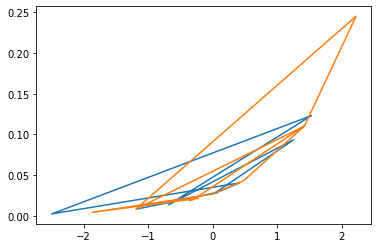

In [44]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

x=np.random.randn(20).reshape(10,2)
plt.plot(x,softmax(x))
plt.show()